In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\Abhinav\Test\Datasets\AML\obesity_data.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
cat_col = df.select_dtypes(include=['object']).columns
for column in cat_col:
    df[column] = encoder.fit_transform(df[column])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [8]:
scaler = StandardScaler()
num_col = df.select_dtypes(include=['float']).columns
df[num_col]=scaler.fit_transform(df[num_col])

In [9]:
from sklearn.cluster import KMeans

Inertia represents the sum of squared distances between each data point and its assigned cluster center. It is a measure of internall coherent the clusters are. In the code, kmeans.inertia_ gives the sum of squared distances for the current clustering with 'k' clusters, and calculates the corresponding inertia after fitting the k-means model for each k.

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\abhin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\abhin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\abhin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


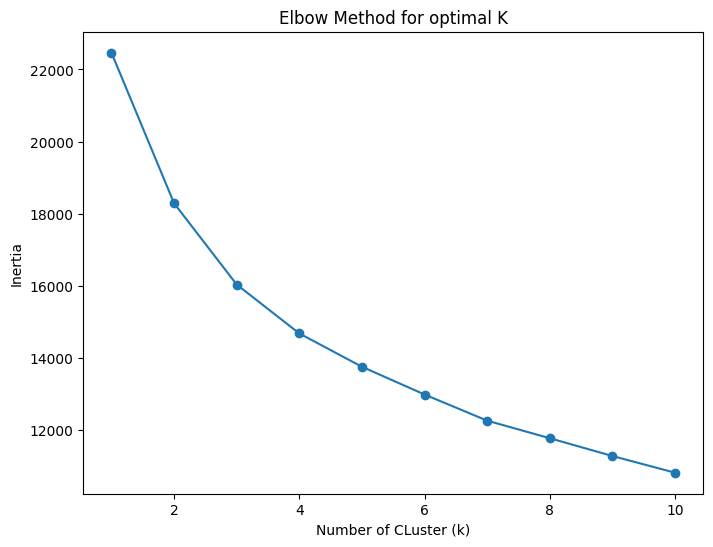

In [10]:
x = df.drop(columns=['NObeyesdad'])
k_values = range(1,11)
inertia=[]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=14)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker = 'o')
plt.xlabel("Number of CLuster (k)")
plt.ylabel("Inertia")
plt.title('Elbow Method for optimal K')
plt.show()

Based on the elbow method, we are choosing 3 as the optimal k.

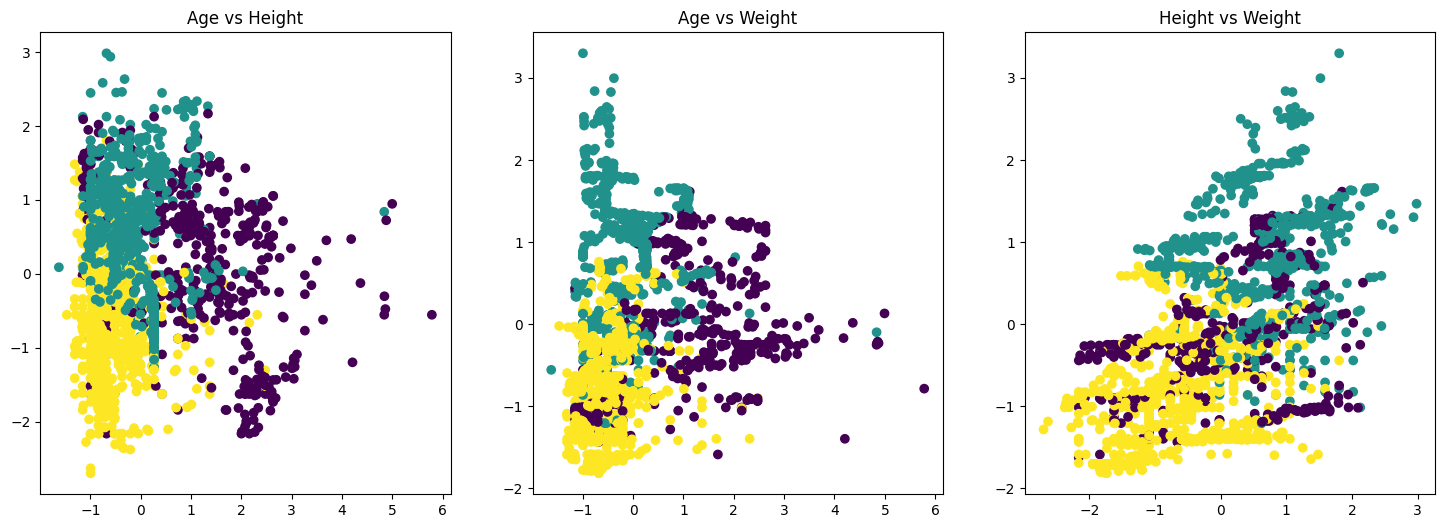

In [11]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=14)
df['Cluster'] = kmeans.fit_predict(x)

fig, axes = plt.subplots(1,3, figsize=(18,6))

axes[0].scatter(df['Age'], df['Height'], c=df['Cluster'], cmap='viridis')
axes[0].set_title('Age vs Height')

axes[1].scatter(df['Age'], df['Weight'], c=df['Cluster'], cmap='viridis')
axes[1].set_title('Age vs Weight')

axes[2].scatter(df['Height'], df['Weight'], c=df['Cluster'], cmap='viridis')
axes[2].set_title('Height vs Weight')

plt.show()